In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_path = "./meme.jpeg"

In [3]:
image = cv2.imread(image_path)

In [4]:
cv2.imshow("image",cv2.imread(image_path))
cv2.waitKey(0)

-1

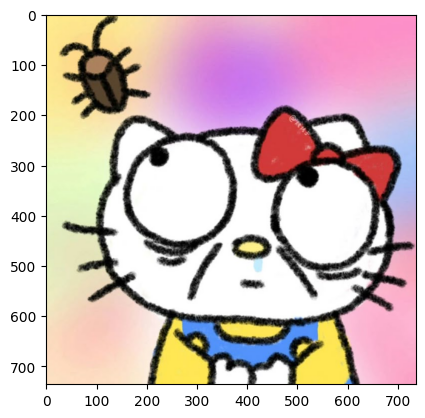

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
!pip install torch


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from torch.utils.data import Dataset
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np
import cv2

50000
(3, 32, 32)
6
uint8


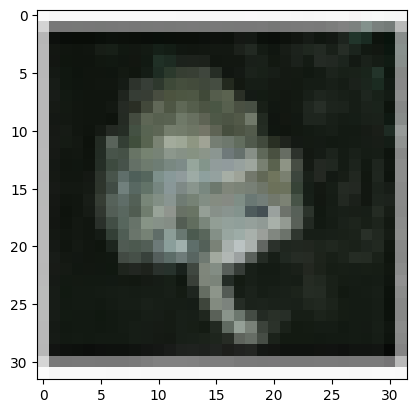

In [38]:
class MyDataSet(Dataset):
    def __init__(self, root, train = True):
        if train:
            data_files = []
            for i in range(1, 6):
                path = os.path.join(root, f"data_batch_{i}")
                data_files.append(path)
        else:
            data_files = [os.path.join(root, "test_batch")]
        self.images = []
        self.labels = []
        for file in data_files:
            with open(file, 'rb') as fo:
                data = pickle.load(fo, encoding='bytes')
                self.images.extend(data[b'data'])
                self.labels.extend(data[b'labels'])

    def __len__(self):
        return len(self.labels)
    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        image = np.array(image, dtype=np.uint8).reshape(3, 32, 32)
        return image, label
if __name__ == "__main__":
    dataset = MyDataSet("./CIFAR-10-batches-py", train=True)
    print(len(dataset))
    image, label = dataset.__getitem__(234)
    print(image.shape)
    print(label)
    print(image.dtype)
    image = np.transpose(image, (1, 2, 0)) 
    plt.imshow(cv2.resize(image, (32, 32)))
    plt.show()

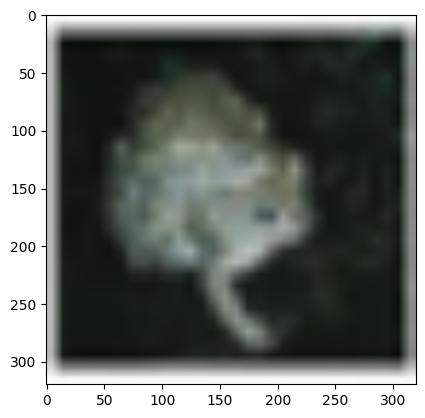

In [40]:
plt.imshow(cv2.resize(image, (320, 320)))
plt.show()

In [4]:
import os
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset
from PIL import Image
import cv2

In [ ]:
import os
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset
from PIL import Image
import cv2
class AnimalDataset(Dataset):
    def __init__(self, root, train=True):
        self.root = root
        if train:
            pass
        data_files =[]
        data_files_path =[]
        self.images_path = []
        self.images = []
        self.labels = []
        self.categories = os.listdir(root)
        for i, category in enumerate(self.categories):
            data_files_path = os.path.join(self.root, category)
            for file_name in os.listdir(data_files_path):
                file_path = os.path.join(data_files_path, file_name)
                self.images_path.append(file_path)
                self.labels.append(i)
                # self.images.append(Image.open(file_path))
                self.images.append(cv2.imread(file_path))
    def __len__(self):
        return len(self.images)
    def __getCategories__(self):
        return self.categories
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label
if __name__ == "__main__":
    root = "./Animals-10"
    dataset = AnimalDataset(root = root, train=True)
    # print(len(dataset))
    # image, label = dataset.__getitem__(1300)
    # print(image.shape)
    # # print(image.show())
    # print(label)
    # print(type(image))
    # print(image.dtype)
    # print(dataset.__getCategories__())
    # # image = cv2.resize(image, (320, 320))   
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.show()  
    # cv2.imshow("image", image)
    # cv2.waitKey(0)

In [8]:
image, label = dataset.__getitem__(1300)
print(label)
cv2.imshow("image", image)
cv2.waitKey(0)

0


-1